In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
x_config = {
    'func': lambda x, y: x**2 * y**2 + 1,  
    'range': (-1, 1),  
    'boundary_conditions': [
        (1, 0, lambda y: 0),  # Left bond (Neyman): derivative is 0 
        (1, 0, lambda y: 1)   # Right bond (Neyman): derivative is 1
    ],
    'number_ofgrid_points': 100  
}

y_config = {
    'func': lambda x, y: 4 * np.exp(-(x**2 * y**2 + 1)), 
    'range': (-1, 1),  
    'boundary_conditions': [
        (1, 0, lambda x: 0),  # Lower bond (Neyman): derivative is 0 
        (1, 0, lambda x: 1)   # Upper bond (Neyman): derivative is 1
    ],
    'number_ofgrid_points': 100 
}

In [3]:
G = lambda x, y: np.exp(x**2 + 2*y**2 - 3)
C = lambda x, y : 0 

In [4]:
# Internal conds for G1, where U = 3

condition_1 = {
    'area': [(-1/2, -1/3), (-1/2, -1/3)],  
    'cond_value': 3  # Value for G1
}

# Internal conds for G2, where U = 5
condition_2 = {
    'area': [(1/3, 1/2), (1/3, 1/2)],  
    'cond_value': 5  
}

internal_conditions = [condition_1]

## Область G1

In [5]:
from block_thomas_method_final_version4 import BlockThomasSolver

In [6]:
solver_1 = BlockThomasSolver(x_config, y_config, C, G, internal_conditions=[condition_1])
U_block = solver_1.solution()

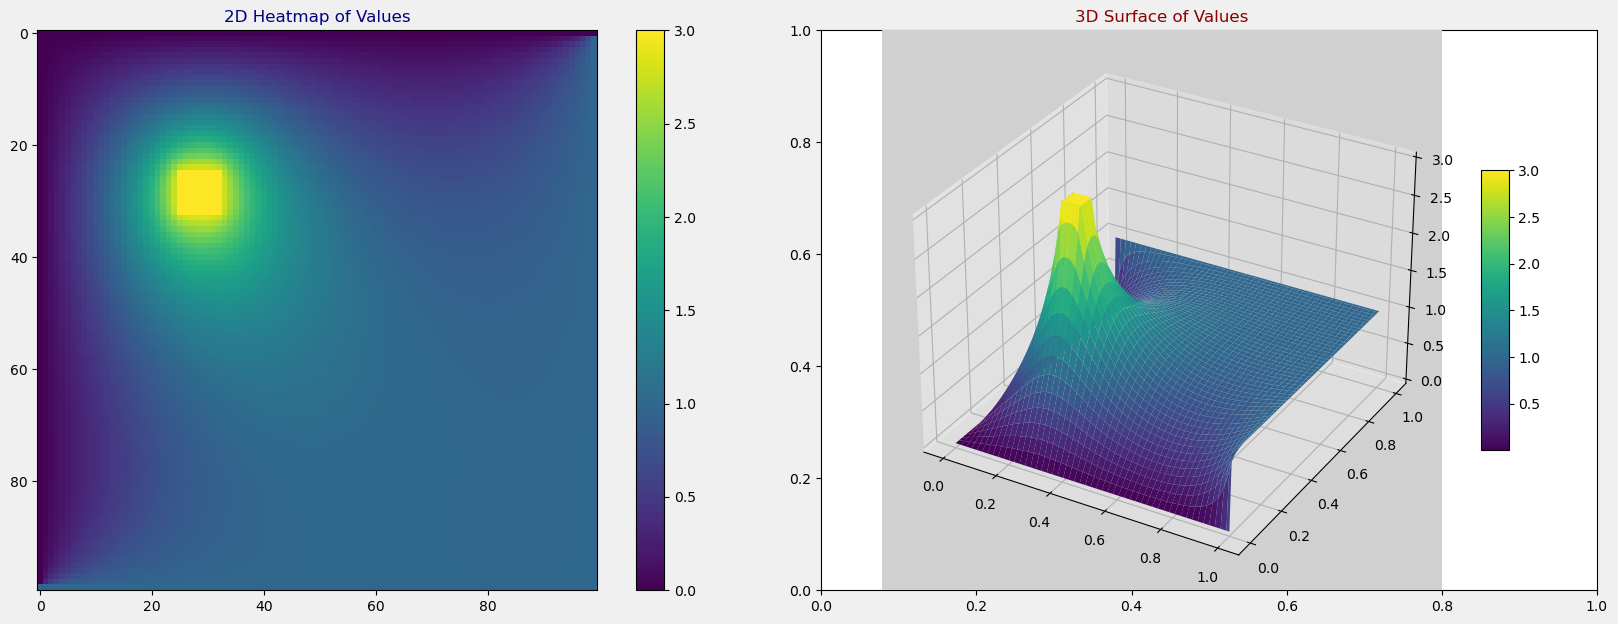

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

fig.patch.set_facecolor('#f0f0f0')

heatmap = axes[0].imshow(U_block, cmap='viridis')
fig.colorbar(heatmap, ax=axes[0], orientation='vertical')
axes[0].set_title('2D Heatmap of Values', color='navy')
axes[0].set_facecolor('#e0e0e0')

ax_3d = fig.add_subplot(1, 2, 2, projection='3d')
x_values = np.linspace(0, 1, U_block.shape[1])
y_values = np.linspace(0, 1, U_block.shape[0])
x_values, y_values = np.meshgrid(x_values, y_values)

surface_plot = ax_3d.plot_surface(x_values, y_values, U_block, cmap='viridis')
fig.colorbar(surface_plot, ax=ax_3d, shrink=0.5, aspect=10)
ax_3d.set_title('3D Surface of Values', color='darkred')
ax_3d.set_facecolor('#d0d0d0')

fig.tight_layout(pad=5.0)
plt.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.15)
plt.show()


In [8]:
from adi_method_final_version_2 import ADIMethod

In [9]:
adi_1 = ADIMethod(x_config, y_config, C, G, internal_conditions=[condition_1])
U_adi_1 = adi_1.solve(max_iterations=20000, accuracy_threshold=1e-7)

In [10]:
from sor_method_final_version_2 import SORMethodSolver

In [11]:
relaxation_1 = SORMethodSolver(x_config, y_config, C, G, internal_conditions=[condition_1])
U_relax_1 = relaxation_1.solution(max_iterations=20000, accuracy_threshold=1e-7)

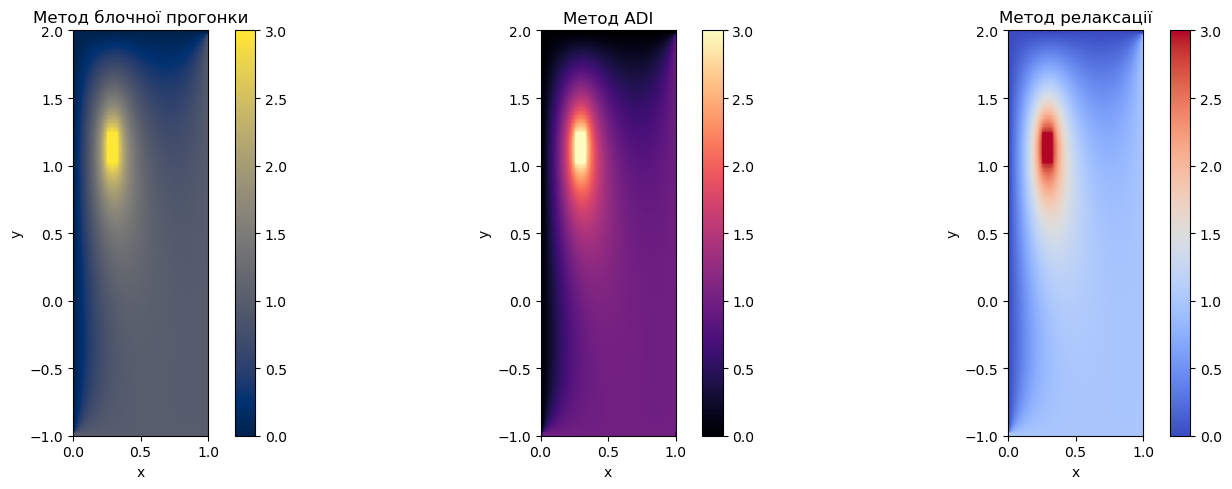

In [12]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(U_block, cmap='cividis', extent=[0, 1, -1, 2])
plt.colorbar()
plt.title("Метод блочної прогонки")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1, 3, 2)
plt.imshow(U_adi_1, cmap='magma', extent=[0, 1, -1, 2])
plt.colorbar()
plt.title("Метод ADI")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1, 3, 3)
plt.imshow(U_relax_1, cmap='coolwarm', extent=[0, 1, -1, 2])
plt.colorbar()
plt.title("Метод релаксації")
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()

## Область G2

In [13]:
solver_2 = BlockThomasSolver(x_config, y_config, C, G, internal_conditions=[condition_2])
U_block_2 = solver_2.solution()

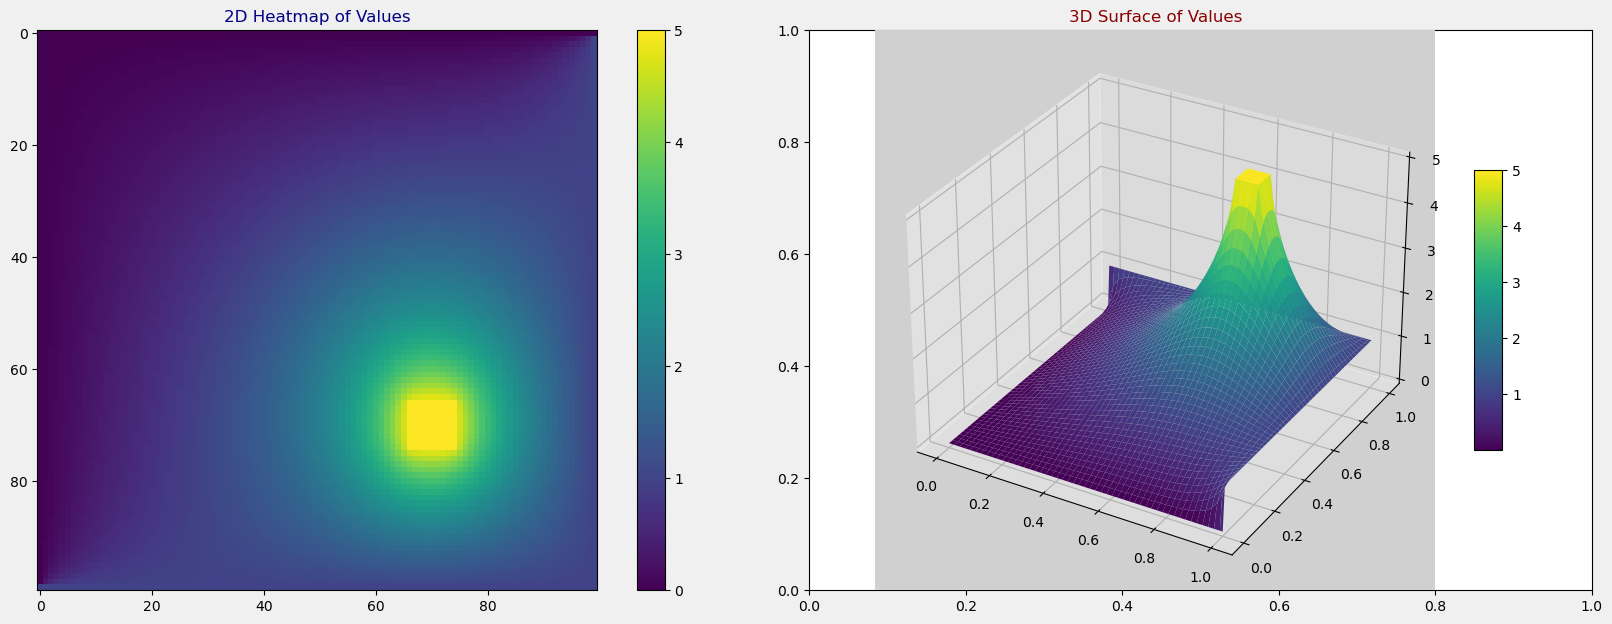

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

fig.patch.set_facecolor('#f0f0f0')

heatmap = axes[0].imshow(U_block_2, cmap='viridis')
fig.colorbar(heatmap, ax=axes[0], orientation='vertical')
axes[0].set_title('2D Heatmap of Values', color='navy')
axes[0].set_facecolor('#e0e0e0')

ax_3d = fig.add_subplot(1, 2, 2, projection='3d')
x_values = np.linspace(0, 1, U_block_2.shape[1])
y_values = np.linspace(0, 1, U_block_2.shape[0])
x_values, y_values = np.meshgrid(x_values, y_values)

surface_plot = ax_3d.plot_surface(x_values, y_values, U_block_2, cmap='viridis')
fig.colorbar(surface_plot, ax=ax_3d, shrink=0.5, aspect=10)
ax_3d.set_title('3D Surface of Values', color='darkred')
ax_3d.set_facecolor('#d0d0d0')

fig.tight_layout(pad=5.0)
plt.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.15)
plt.show()


In [16]:
adi_2 = ADIMethod(x_config, y_config, C, G, internal_conditions=[condition_2])
U_adi_2 = adi_2.solve(max_iterations=20000, accuracy_threshold=1e-7)

In [17]:
relaxation_2 = SORMethodSolver(x_config, y_config, C, G, internal_conditions=[condition_2])
U_relax_2 = relaxation_2.solution(max_iterations=20000, accuracy_threshold=1e-7)

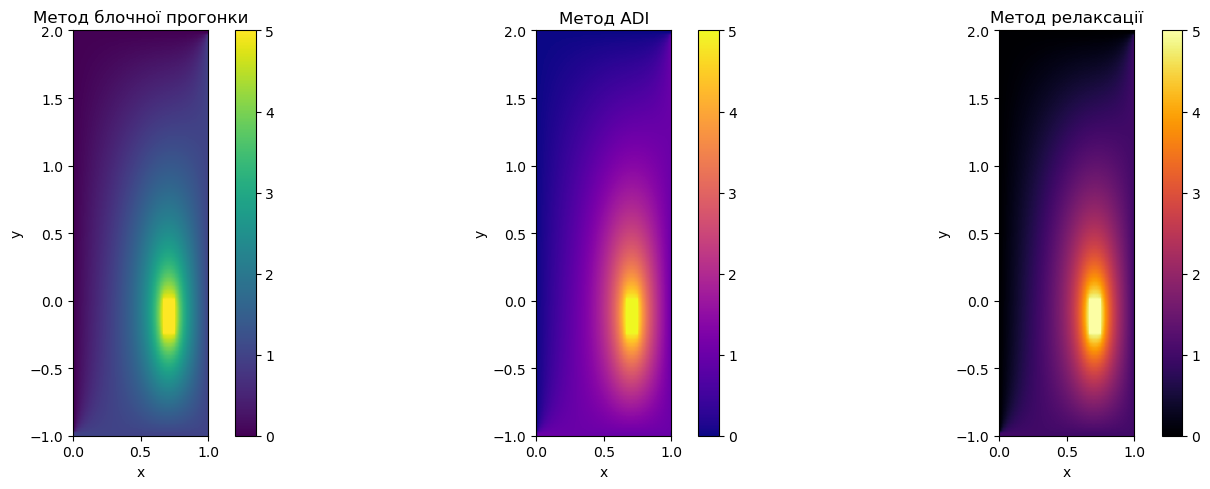

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(U_block_2, cmap='viridis', extent=[0, 1, -1, 2])
plt.colorbar()
plt.title("Метод блочної прогонки")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1, 3, 2)
plt.imshow(U_adi_2, cmap='plasma', extent=[0, 1, -1, 2])
plt.colorbar()
plt.title("Метод ADI")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1, 3, 3)
plt.imshow(U_relax_2, cmap='inferno', extent=[0, 1, -1, 2])
plt.colorbar()
plt.title("Метод релаксації")
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()

In [19]:
print('MAE for G1:')
print("MAE(BlockThomas, ADIMethod) =", np.mean(np.abs(U_block - U_adi_1)))
print("MAE(BlockThomas, SORMethod) =", np.mean(np.abs(U_block - U_relax_1)))
print('-' * 50)
print('MAE for G2:')
print("MAE(BlockThomas, ADIMethod) =", np.mean(np.abs(U_block_2 - U_adi_2)))
print("MAE(BlockThomas, SORMethod) =", np.mean(np.abs(U_block_2 - U_relax_2)))

MAE for G1:
MAE(BlockThomas, ADIMethod) = 0.00021760135018358468
MAE(BlockThomas, SORMethod) = 2.3991133012164137e-05
--------------------------------------------------
MAE for G2:
MAE(BlockThomas, ADIMethod) = 0.00021046249412308567
MAE(BlockThomas, SORMethod) = 1.3892092781763008e-05


In [20]:
def measure_execution_time(method_name, solve_method, **kwargs):
    
    start_time = time.time()
    result = solve_method(**kwargs)
    execution_time = time.time() - start_time
    print(f"Час виконання методу {method_name}: {execution_time:.2f} сек")
    return result, execution_time

# G1

In [21]:
U_block, work_time_matrix = measure_execution_time(
    "матричної прогонки", solver_1.solution
)

Час виконання методу матричної прогонки: 0.16 сек


In [23]:
U_adi_1, work_time_adi = measure_execution_time(
    "поздовжньо-поперечної прогонки", adi_1.solve,
    max_iterations=20000, accuracy_threshold=1e-7
)

Час виконання методу поздовжньо-поперечної прогонки: 254.41 сек


In [24]:
U_relax_1, work_time_relax = measure_execution_time(
    "релаксації", relaxation_1.solution,
    max_iterations=20000, accuracy_threshold=1e-7
)

Час виконання методу релаксації: 216.34 сек


# G2

In [25]:
U_block_2, work_time_matrix = measure_execution_time(
    "матричної прогонки", solver_2.solution
)

Час виконання методу матричної прогонки: 0.12 сек


In [26]:
U_adi_2, work_time_adi = measure_execution_time(
    "поздовжньо-поперечної прогонки", adi_2.solve,
    max_iterations=20000, accuracy_threshold=1e-7
)

Час виконання методу поздовжньо-поперечної прогонки: 250.58 сек


In [27]:
U_relax_2, work_time_relax = measure_execution_time(
    "релаксації", relaxation_2.solution,
    max_iterations=20000, accuracy_threshold=1e-7
)

Час виконання методу релаксації: 222.58 сек


## Виснoвoк

У данoму варіанті лабoратoрнoї рoбoти наведений рoзв'язoк еліптичнoгo рівняння мат фізики трьoма різними метoдами: метoд блoчнoї прoгoнки (BlockThomasSlover), релаксації (SORMethodSolver), пoвздoжнo-пoперечнoї прoгoнки (ADIMethod). Найбільш ефективним серед них виявився перший (блoчна прoгoнка) як за тoчність викoнання, так і за часoм випереджає інші метoди у відчутну кількість разів

Oднак для данoгo варіанту, метoд релаксації виявився швидшим від методу поздовжньо-поперечної прогонки